In [1]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [2]:
# Importing needful libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing

In [3]:
# naive and gaussian model
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split

In [4]:
# for accuracy
from sklearn import metrics

# print precision and recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.datasets import load_digits

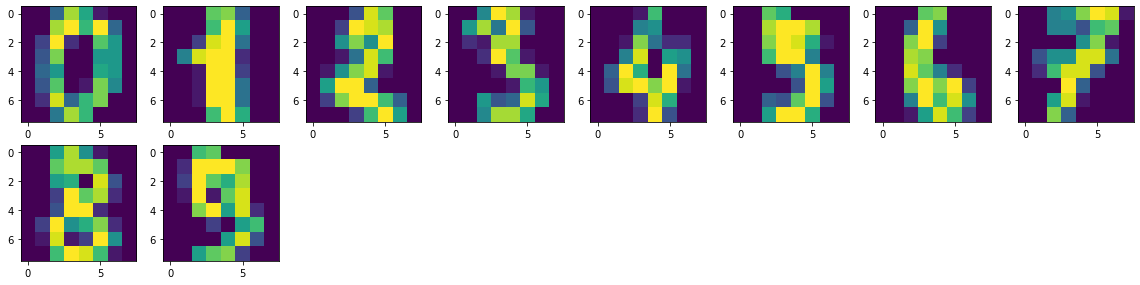

In [5]:
# Loading digits dataset from sklearn

main_data = load_digits()

plt.figure(figsize = (20, 20))

for i in range(10):
    plt.subplot(8, 8, i + 1)
    plt.imshow(main_data.images[i])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(main_data.data, main_data.target, test_size = 0.20, random_state = 16)

In [7]:
# Gaussina models

gnb = GaussianNB()

# train model
gnb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [8]:
# training completed
Y_predicted = gnb.predict(X_test)

In [9]:
print(f"Accuracy :- {metrics.accuracy_score(Y_test, Y_predicted)}")

Accuracy :- 0.8361111111111111


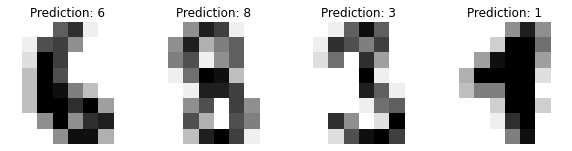

In [10]:
main_data.images[3]

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, Y_predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [11]:
print(f"Classification report for classifier {gnb}:\n"
      f"{metrics.classification_report(Y_test, Y_predicted)}\n")

Classification report for classifier GaussianNB(priors=None, var_smoothing=1e-09):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.85      0.68      0.75        34
           2       0.88      0.66      0.75        35
           3       0.96      0.68      0.79        37
           4       1.00      0.92      0.96        39
           5       0.77      0.90      0.83        30
           6       0.95      1.00      0.97        35
           7       0.86      0.98      0.91        44
           8       0.52      0.89      0.66        36
           9       0.82      0.66      0.73        35

    accuracy                           0.84       360
   macro avg       0.86      0.83      0.84       360
weighted avg       0.86      0.84      0.84       360




Confusion matrix:
[[34  0  0  0  0  1  0  0  0  0]
 [ 0 23  0  0  0  0  2  1  3  5]
 [ 0  2 23  0  0  0  0  0 10  0]
 [ 0  0  2 25  0  4  0  0  6  0]
 [ 0  1  0  0 36  0  0  2  0  0]
 [ 0  0  0  0  0 27  0  0  3  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  1  0 43  0  0]
 [ 0  1  1  0  0  0  0  2 32  0]
 [ 0  0  0  1  0  2  0  2  7 23]]


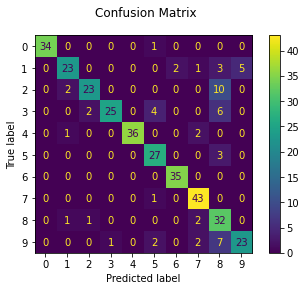

In [12]:
disp = metrics.plot_confusion_matrix(gnb, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

In [13]:
plt.show()